**Build machine Learning model(classification) for the airbnb dataset listed below:**

**1) Do data ingestion (convert dataset into dataframe)**

**2) Do some pre-processing(if required), follow the steps for ML model creation.**

**3) Build multiple ML models(use different classification algorithms) and compare the accuracies.**

**4) Evaluate the model and write down the summarization of the process.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
airbnb_dataset = pd.read_csv("/content/AirBNB.csv")
print("There are {airbnb_dataset.shape[0]} rows and {airbnb.dataset.shape[1]} columns.")

np.random.seed(1)  # To get the same random results every time
airbnb_dataset.sample(n=10)

There are {airbnb_dataset.shape[0]} rows and {airbnb.dataset.shape[1]} columns.


<ipython-input-412-576dcef0330f>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_dataset = pd.read_csv("/content/AirBNB.csv")


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
56850,13586614,Entire home/apt,5.0,2.0,strict,False,f,100.0,2.0,3.0,7.408531
68140,18222981,Private room,3.0,1.0,strict,True,f,95.0,1.0,2.0,4.605170
23189,13915528,Entire home/apt,2.0,1.0,strict,True,f,95.0,1.0,2.0,4.094345
47255,7122067,Private room,1.0,1.0,flexible,False,f,100.0,1.0,1.0,4.317488
45933,12384924,Entire home/apt,5.0,2.0,strict,True,f,95.0,2.0,3.0,5.433722
66955,3999628,Private room,2.0,1.0,moderate,True,f,98.0,1.0,1.0,5.010635
18553,4948442,Entire home/apt,1.0,1.0,strict,False,f,NaN,0.0,1.0,5.010635
26117,666837,Shared room,16.0,2.0,flexible,False,f,76.0,1.0,1.0,2.708050
65737,15929932,Entire home/apt,10.0,1.0,strict,False,f,93.0,2.0,2.0,4.976734
8915,21173263,Entire home/apt,3.0,1.0,strict,True,f,95.0,0.0,2.0,4.700480


In [ ]:
airbnb_dataset.info() # Required information about the given dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [ ]:
airbnb_dataset.isnull().sum()  # To know the number of missing values in the given dataset

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [ ]:
airbnb_dataset.isnull().any()  #To indicate if any values are missing

id                      False
room_type                True
accommodates             True
bathrooms                True
cancellation_policy      True
cleaning_fee             True
instant_bookable        False
review_scores_rating     True
bedrooms                 True
beds                     True
log_price               False
dtype: bool

In [ ]:
airbnb_dataset[airbnb_dataset.duplicated()].count()

id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [ ]:
airbnb_dataset.nunique()        #returns the number of unique values for each column.

id                      74111
room_type                   3
accommodates               16
bathrooms                  17
cancellation_policy         3
cleaning_fee                2
instant_bookable            2
review_scores_rating       54
bedrooms                   11
beds                       18
log_price                 767
dtype: int64

In [ ]:
airbnb_dataset.describe().T #To get the transpose index and columns.

,count,mean,std,min,25%,50%,75%,max
id,74111.0,1.126662e+07,6.081735e+06,344.0,6.261964e+06,1.225415e+07,1.640226e+07,2.123090e+07
accommodates,74108.0,3.155125e+00,2.153603e+00,1.0,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,73908.0,1.235272e+00,5.820540e-01,0.0,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
review_scores_rating,57389.0,9.406736e+01,7.836556e+00,20.0,9.200000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,74019.0,1.265797e+00,8.521487e-01,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
beds,73980.0,1.710868e+00,1.254142e+00,0.0,1.000000e+00,1.000000e+00,2.000000e+00,1.800000e+01
log_price,74111.0,4.782069e+00,7.173938e-01,0.0,4.317488e+00,4.709530e+00,5.220356e+00,7.600402e+00


##**LOOKING VALUE COUNTS FOR NON-NUMERIC FEATURES**##

In [ ]:
num_to_display = 10
for colname in airbnb_dataset.dtypes[airbnb_dataset.dtypes == 'object'].index:
    val_counts = airbnb_dataset[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between

Entire home/apt    41308
Private room       30635
Shared room         2163
NaN                    5
Name: room_type, dtype: int64



strict      32500
flexible    22543
moderate    19060
NaN             8
Name: cancellation_policy, dtype: int64



True     54399
False    19708
NaN          4
Name: cleaning_fee, dtype: int64



f    54660
t    19451
Name: instant_bookable, dtype: int64





**COLUMN PROCESSING**

In [ ]:
cols = airbnb_dataset.select_dtypes(['object'])
cols.columns

Index(['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable'], dtype='object')

In [ ]:
for i in cols.columns:
    airbnb_dataset[i] = airbnb_dataset[i].astype('category')

In [ ]:
airbnb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    74111 non-null  int64   
 1   room_type             74106 non-null  category
 2   accommodates          74108 non-null  float64 
 3   bathrooms             73908 non-null  float64 
 4   cancellation_policy   74103 non-null  category
 5   cleaning_fee          74107 non-null  category
 6   instant_bookable      74111 non-null  category
 7   review_scores_rating  57389 non-null  float64 
 8   bedrooms              74019 non-null  float64 
 9   beds                  73980 non-null  float64 
 10  log_price             74111 non-null  float64 
dtypes: category(4), float64(6), int64(1)
memory usage: 4.2 MB


##**FINDING MISSING VALUES**##

In [ ]:
airbnb_dataset = airbnb_dataset.replace('?', np.nan)
#A substitute for declaring value which are numerical values that are missing values in an array

In [ ]:
airbnb_dataset.sample(n=50)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
59601,13567393,Entire home/apt,3.0,2.0,flexible,False,f,NaN,2.0,1.0,4.248495
43446,17640554,Entire home/apt,4.0,1.0,strict,True,t,88.0,0.0,1.0,4.499810
7997,600295,Entire home/apt,4.0,1.0,strict,True,f,100.0,2.0,2.0,5.298317
17414,6079197,Private room,1.0,1.0,moderate,True,f,100.0,1.0,1.0,3.433987
3957,1180537,Entire home/apt,8.0,2.0,strict,True,f,99.0,4.0,4.0,5.988961
6033,19504042,Entire home/apt,2.0,1.5,moderate,True,f,100.0,1.0,1.0,4.787492
29784,4802374,Private room,2.0,1.0,strict,True,f,100.0,1.0,1.0,4.442651
19117,349841,Entire home/apt,3.0,1.0,flexible,True,f,NaN,1.0,1.0,5.141664
23723,6741968,Private room,2.0,1.0,flexible,True,t,NaN,1.0,1.0,4.077537
35746,6115291,Private room,2.0,2.0,moderate,True,f,97.0,1.0,1.0,4.442651


In [ ]:
airbnb_dataset['review_scores_rating'] = airbnb_dataset['review_scores_rating'].fillna(airbnb_dataset['review_scores_rating'].min())

In [ ]:
series = pd.isnull(airbnb_dataset["review_scores_rating"])

In [ ]:
airbnb_dataset['review_scores_rating'] = airbnb_dataset['review_scores_rating'].fillna(airbnb_dataset['review_scores_rating'].min())

In [ ]:
airbnb_dataset[series]

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price


In [ ]:
airbnb_dataset['bathrooms'] = airbnb_dataset['bathrooms'].fillna(airbnb_dataset['bathrooms'].median())

In [ ]:
airbnb_dataset['bedrooms'] = airbnb_dataset['bedrooms'].fillna(airbnb_dataset['bedrooms'].median())

In [ ]:
airbnb_dataset['beds'] = airbnb_dataset['beds'].fillna(airbnb_dataset['beds'].median())

In [ ]:
airbnb_dataset['accommodates'] = airbnb_dataset['accommodates'].fillna(airbnb_dataset['accommodates'].median())

In [ ]:
airbnb_dataset.sample(n=50)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
41874,4395384,Private room,2.0,1.0,strict,False,f,100.0,1.0,1.0,4.007333
2342,2105487,Entire home/apt,4.0,2.0,strict,True,f,86.0,2.0,2.0,5.241747
21809,9040214,Entire home/apt,8.0,4.0,moderate,True,f,100.0,4.0,5.0,5.521461
37956,7559867,Entire home/apt,6.0,1.0,flexible,True,f,92.0,3.0,3.0,5.298317
53994,10469455,Private room,2.0,1.0,strict,False,f,90.0,4.0,4.0,3.850148
10647,8054651,Private room,1.0,1.5,flexible,False,f,100.0,1.0,1.0,3.912023
66134,19252113,Private room,1.0,1.0,moderate,True,f,97.0,1.0,1.0,4.553877
15207,14821542,Entire home/apt,4.0,1.0,flexible,False,f,20.0,2.0,2.0,5.298317
62184,12930677,Entire home/apt,3.0,1.0,moderate,True,t,84.0,1.0,2.0,4.787492
35808,9391509,Entire home/apt,4.0,2.0,strict,True,f,93.0,2.0,2.0,5.298317


##**REPLACING CATEGORICAL VALUES IN MISSING VALUES**##

In [ ]:
bool_series = pd.isnull(airbnb_dataset["room_type"])

In [ ]:
airbnb_dataset[bool_series]

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
141,457555,NaN,1.0,1.0,flexible,False,f,20.0,1.0,1.0,5.521461
167,6374167,NaN,5.0,1.0,strict,True,f,97.0,2.0,3.0,5.575949
195,19981334,NaN,2.0,1.0,moderate,True,f,99.0,1.0,1.0,3.555348
255,455801,NaN,4.0,1.0,moderate,True,f,91.0,1.0,2.0,4.418841
552,4874722,NaN,1.0,2.5,strict,True,t,100.0,1.0,1.0,4.488636


In [ ]:
airbnb_dataset["room_type"].fillna("Entire home/apt", inplace = True)

In [ ]:
airbnb_dataset[bool_series]

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
141,457555,Entire home/apt,1.0,1.0,flexible,False,f,20.0,1.0,1.0,5.521461
167,6374167,Entire home/apt,5.0,1.0,strict,True,f,97.0,2.0,3.0,5.575949
195,19981334,Entire home/apt,2.0,1.0,moderate,True,f,99.0,1.0,1.0,3.555348
255,455801,Entire home/apt,4.0,1.0,moderate,True,f,91.0,1.0,2.0,4.418841
552,4874722,Entire home/apt,1.0,2.5,strict,True,t,100.0,1.0,1.0,4.488636


In [ ]:
bool_series = pd.isnull(airbnb_dataset["cancellation_policy"])

In [ ]:
airbnb_dataset[bool_series]

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
205,2754149,Private room,2.0,1.0,NaN,NaN,t,96.0,1.0,1.0,4.584967
209,14783267,Entire home/apt,2.0,1.0,NaN,NaN,f,93.0,1.0,1.0,4.787492
232,12265833,Entire home/apt,2.0,1.0,NaN,NaN,f,100.0,1.0,1.0,5.298317
348,18388570,Entire home/apt,2.0,1.0,NaN,False,f,20.0,0.0,1.0,4.605170
349,20620600,Private room,2.0,1.0,NaN,True,f,20.0,1.0,1.0,5.220356
399,2484207,Entire home/apt,2.0,1.0,NaN,NaN,t,100.0,1.0,1.0,5.703782
454,7939196,Entire home/apt,2.0,1.0,NaN,True,f,82.0,1.0,3.0,4.867534
574,169306,Entire home/apt,3.0,1.0,NaN,False,f,20.0,0.0,2.0,4.317488


In [ ]:
airbnb_dataset["cancellation_policy"].fillna("strict", inplace = True)

In [ ]:
airbnb_dataset[bool_series]

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
205,2754149,Private room,2.0,1.0,strict,NaN,t,96.0,1.0,1.0,4.584967
209,14783267,Entire home/apt,2.0,1.0,strict,NaN,f,93.0,1.0,1.0,4.787492
232,12265833,Entire home/apt,2.0,1.0,strict,NaN,f,100.0,1.0,1.0,5.298317
348,18388570,Entire home/apt,2.0,1.0,strict,False,f,20.0,0.0,1.0,4.605170
349,20620600,Private room,2.0,1.0,strict,True,f,20.0,1.0,1.0,5.220356
399,2484207,Entire home/apt,2.0,1.0,strict,NaN,t,100.0,1.0,1.0,5.703782
454,7939196,Entire home/apt,2.0,1.0,strict,True,f,82.0,1.0,3.0,4.867534
574,169306,Entire home/apt,3.0,1.0,strict,False,f,20.0,0.0,2.0,4.317488


In [ ]:
airbnb_dataset['cleaning_fee'].value_counts()

True     54399
False    19708
Name: cleaning_fee, dtype: int64

In [ ]:
airbnb_dataset.cleaning_fee = airbnb_dataset.cleaning_fee.fillna(True)

In [ ]:
airbnb_dataset['instant_bookable'] = airbnb_dataset['instant_bookable'].map(
                   {'t':True ,'f':False})

In [ ]:
airbnb_dataset.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           id  room_type  accommodates  bathrooms  cancellation_policy  \
0      False      False         False      False                False   
1      False      False         False      False                False   
2      False      False         False      False                False   
3      False      False         False      False                False   
4      False      False         False      False                False   
...      ...        ...           ...        ...                  ...   
74106  False      False         False      False                False   
74107  False      False         False      False                False   
74108  False      False         False      False                False   
74109  False      False         False      False                False   
74110  False      False         False      False                False   

       cleaning_fee  instant_bookable  review_scores_rating  

##**EDA**##

**Univariate Analysis**

In [ ]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [ ]:
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

    plt.show() # show the plot

<ipython-input-446-0b72a5a5469d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram


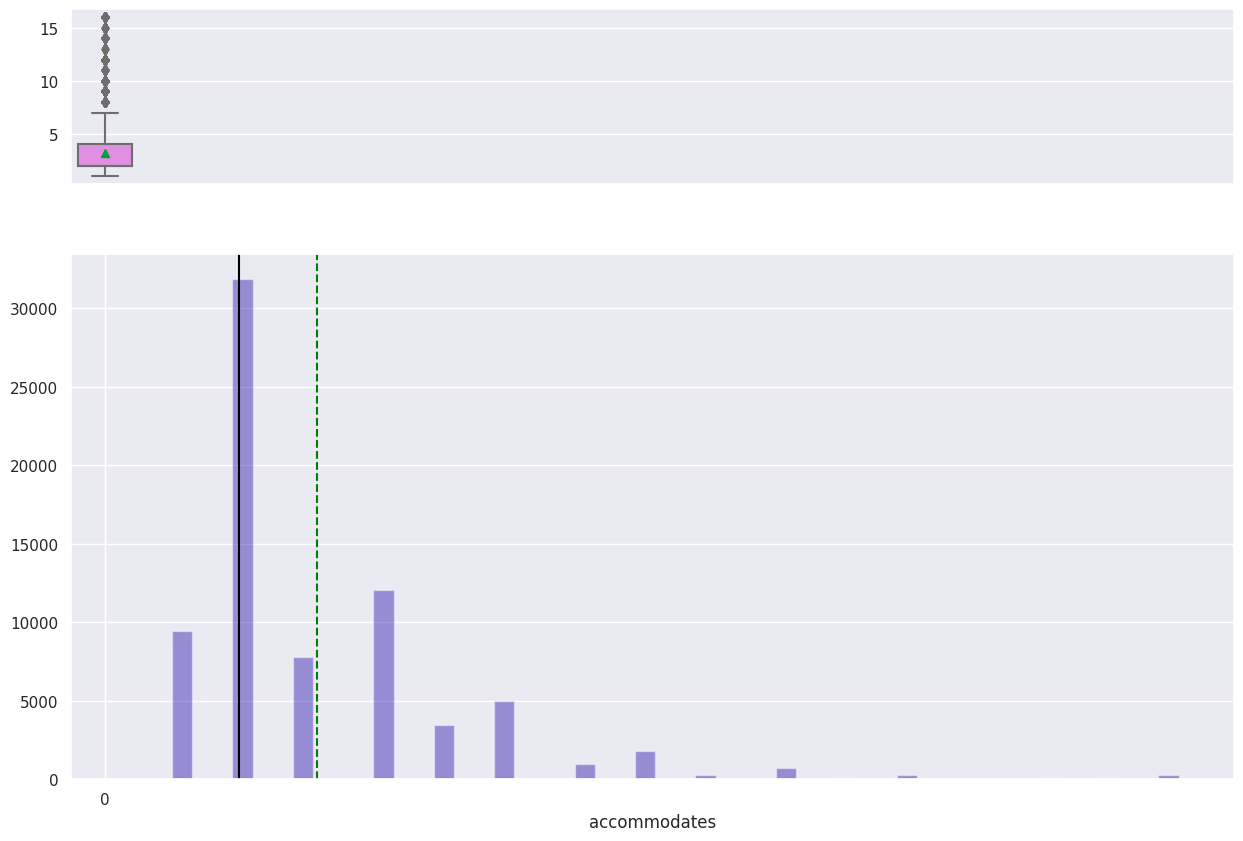

In [ ]:
histogram_boxplot(airbnb_dataset['accommodates'])

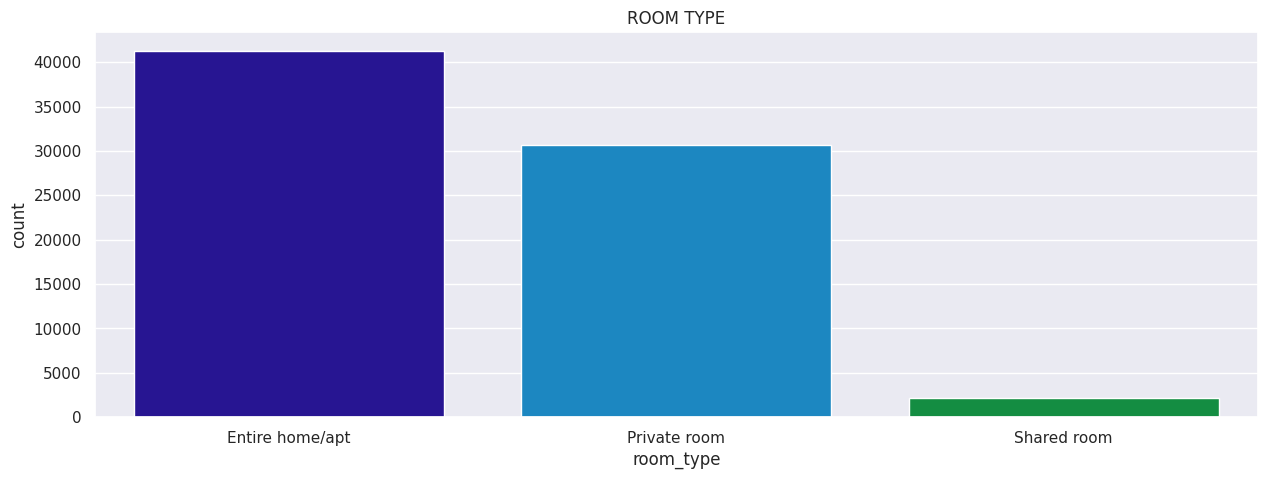

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='room_type', data=airbnb_dataset)
plt.title('ROOM TYPE')
plt.show()

<ipython-input-446-0b72a5a5469d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram


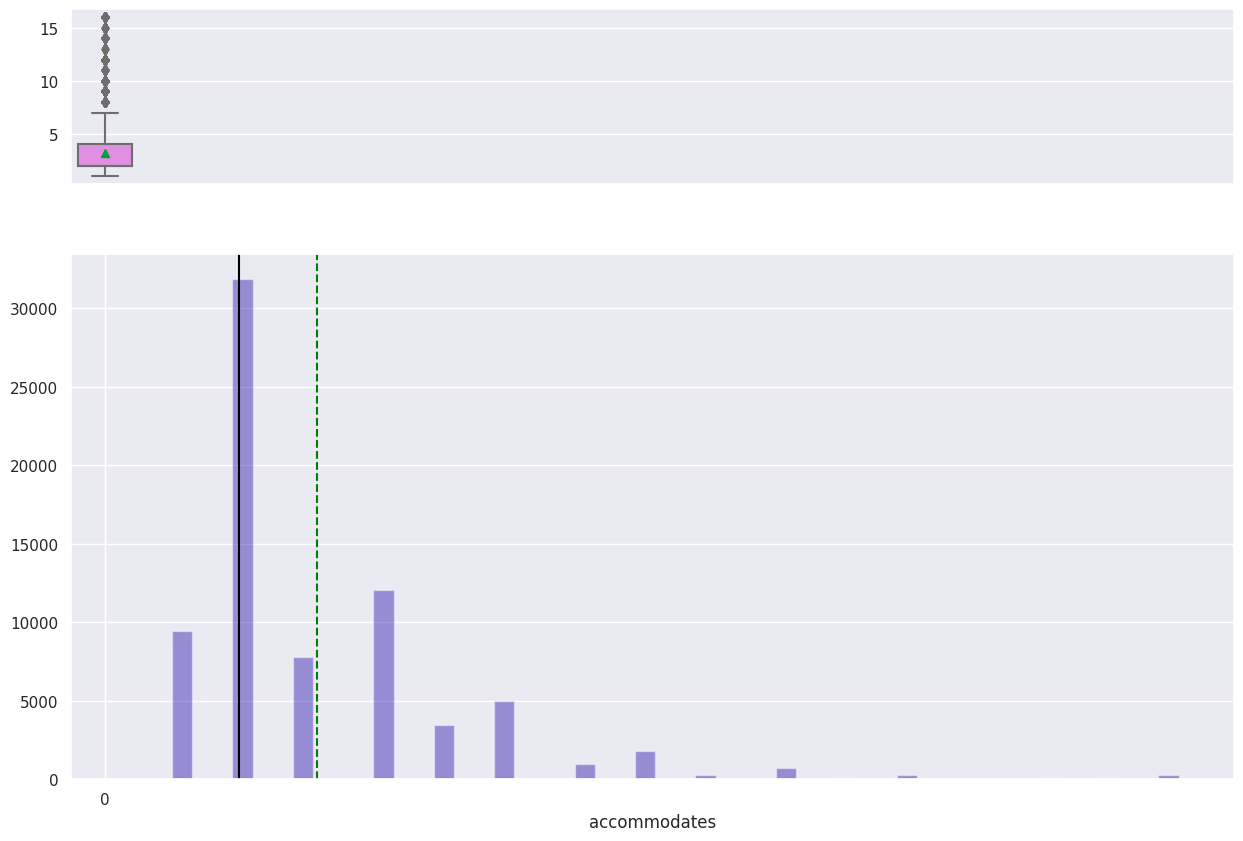

In [ ]:
histogram_boxplot(airbnb_dataset['accommodates'])

<ipython-input-446-0b72a5a5469d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram


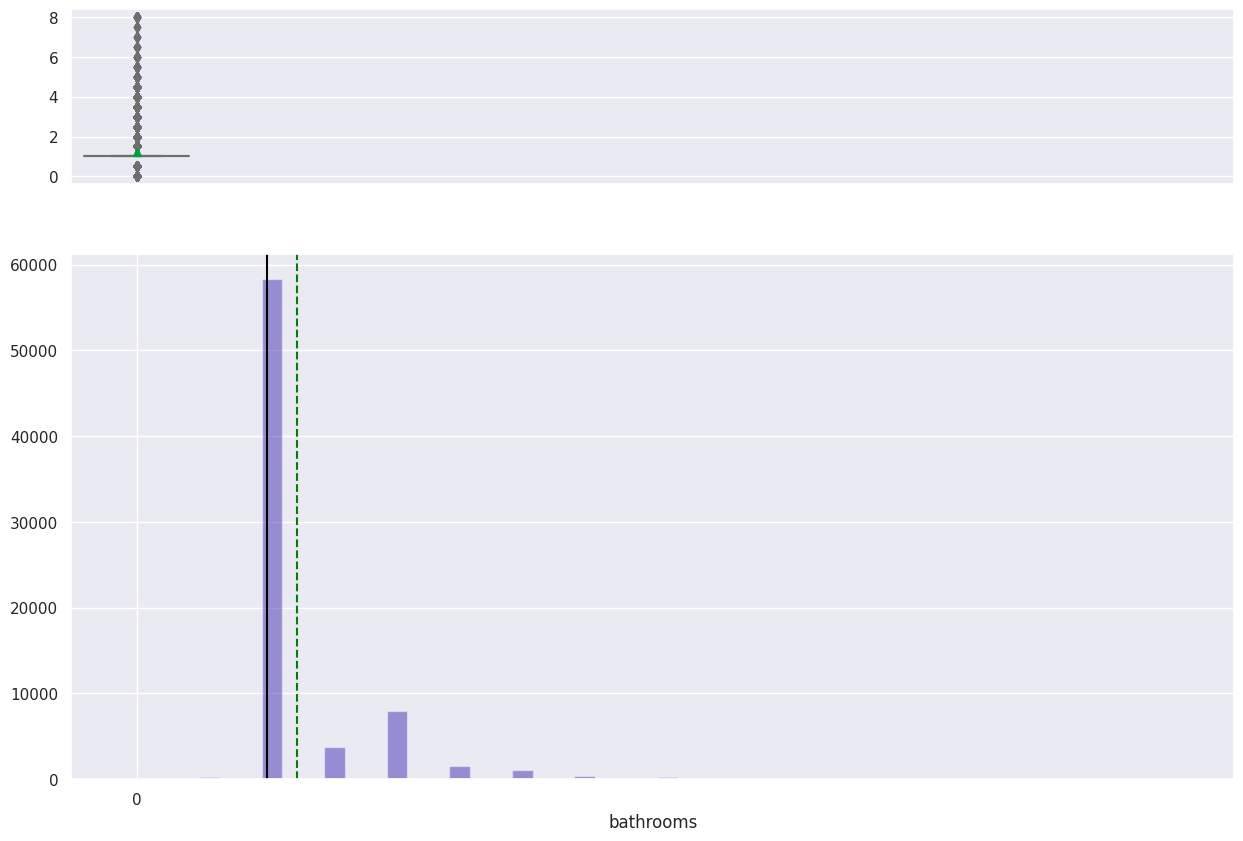

In [ ]:
histogram_boxplot(airbnb_dataset['bathrooms'])

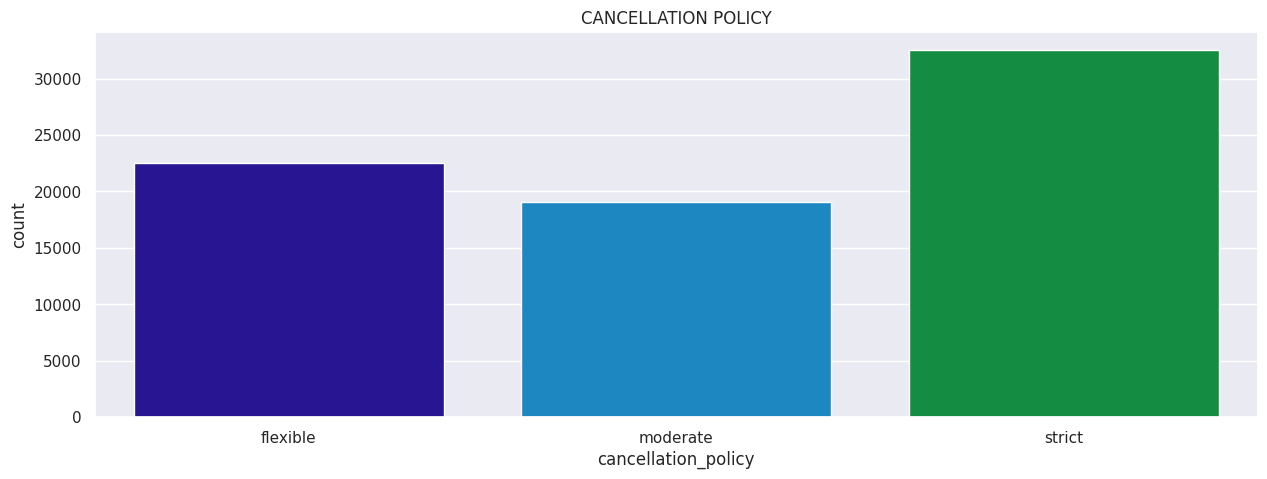

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='cancellation_policy', data=airbnb_dataset)
plt.title('CANCELLATION POLICY')
plt.show()

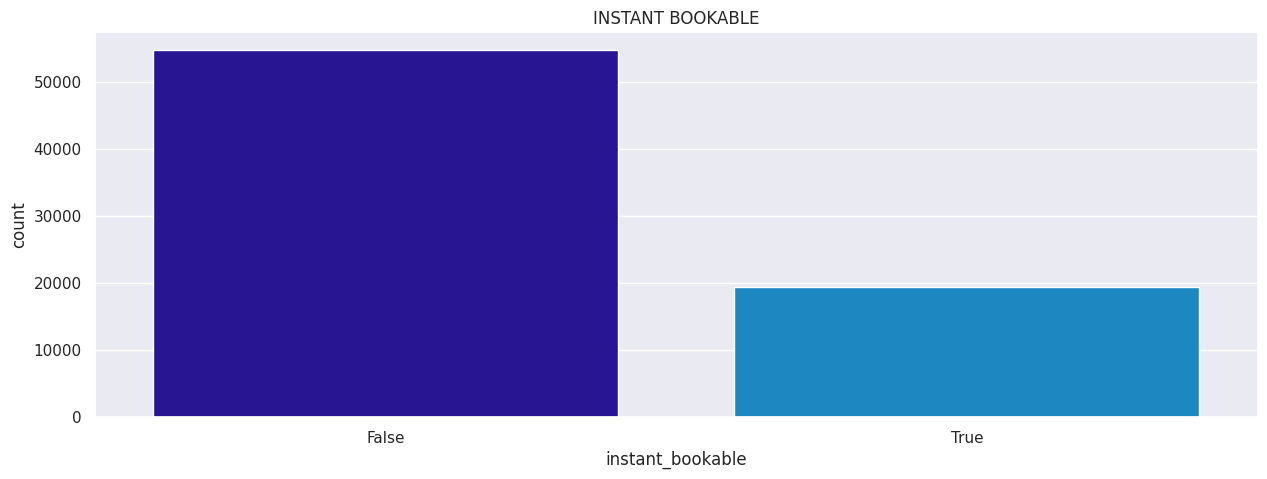

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='instant_bookable', data=airbnb_dataset)
plt.title('INSTANT BOOKABLE')
plt.show()

<ipython-input-446-0b72a5a5469d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram


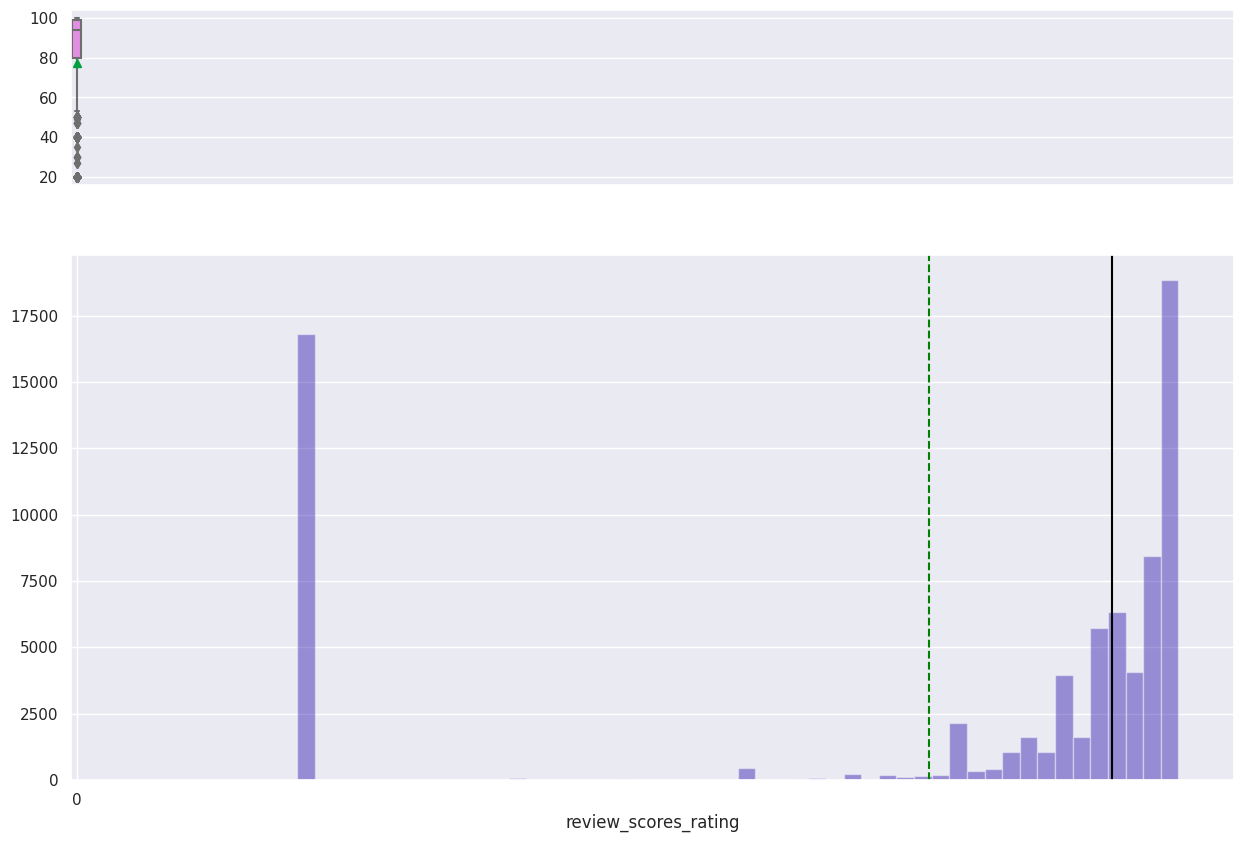

In [ ]:
histogram_boxplot(airbnb_dataset['review_scores_rating'])

<ipython-input-446-0b72a5a5469d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram


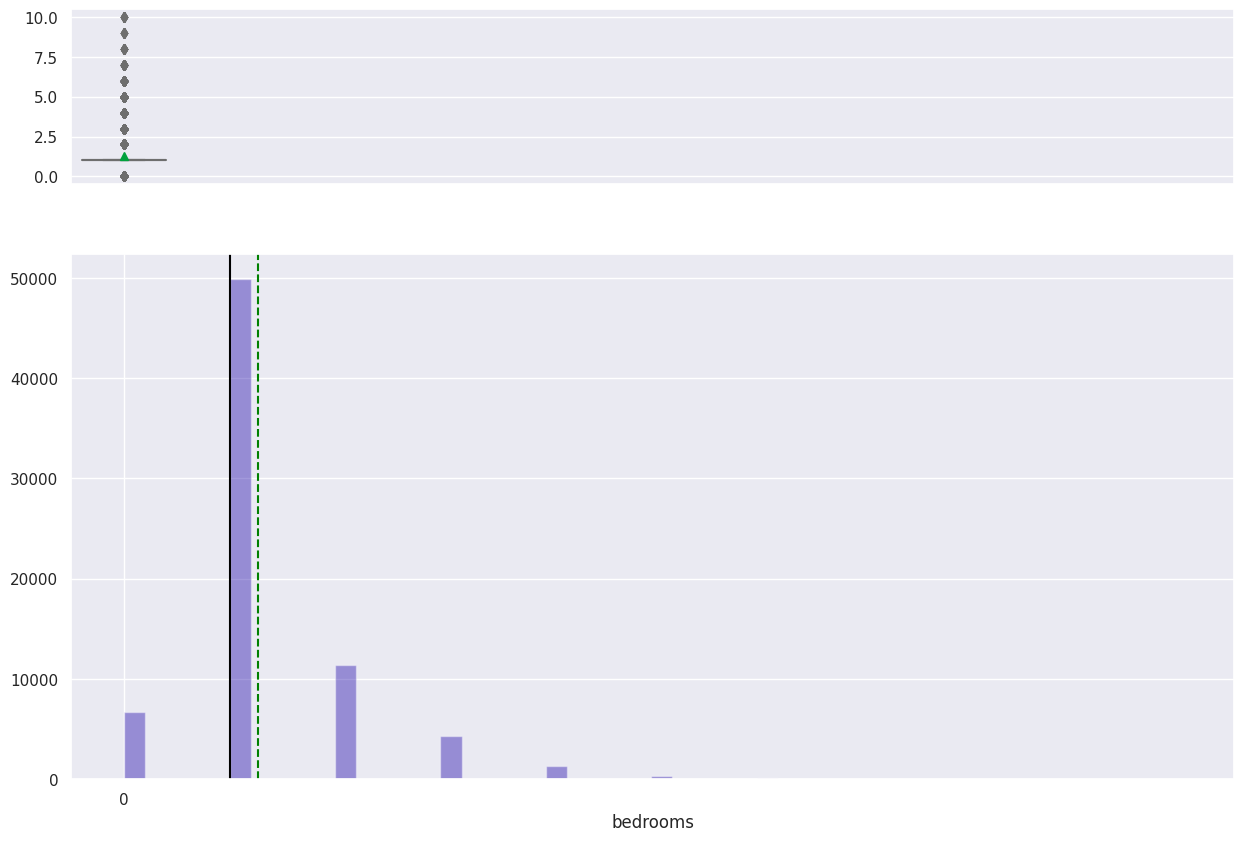

In [ ]:
histogram_boxplot(airbnb_dataset['bedrooms'])

<ipython-input-446-0b72a5a5469d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram


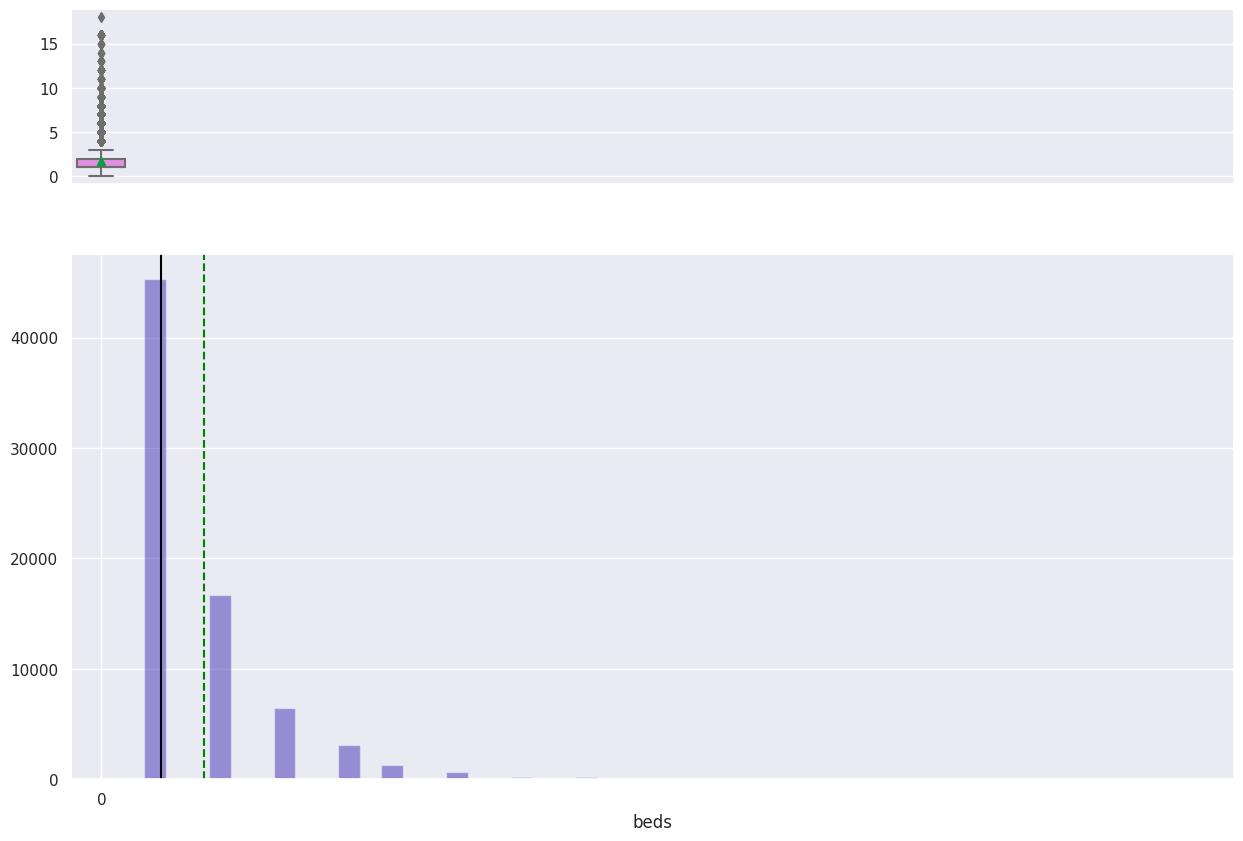

In [ ]:
histogram_boxplot(airbnb_dataset['beds'])

<ipython-input-446-0b72a5a5469d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram


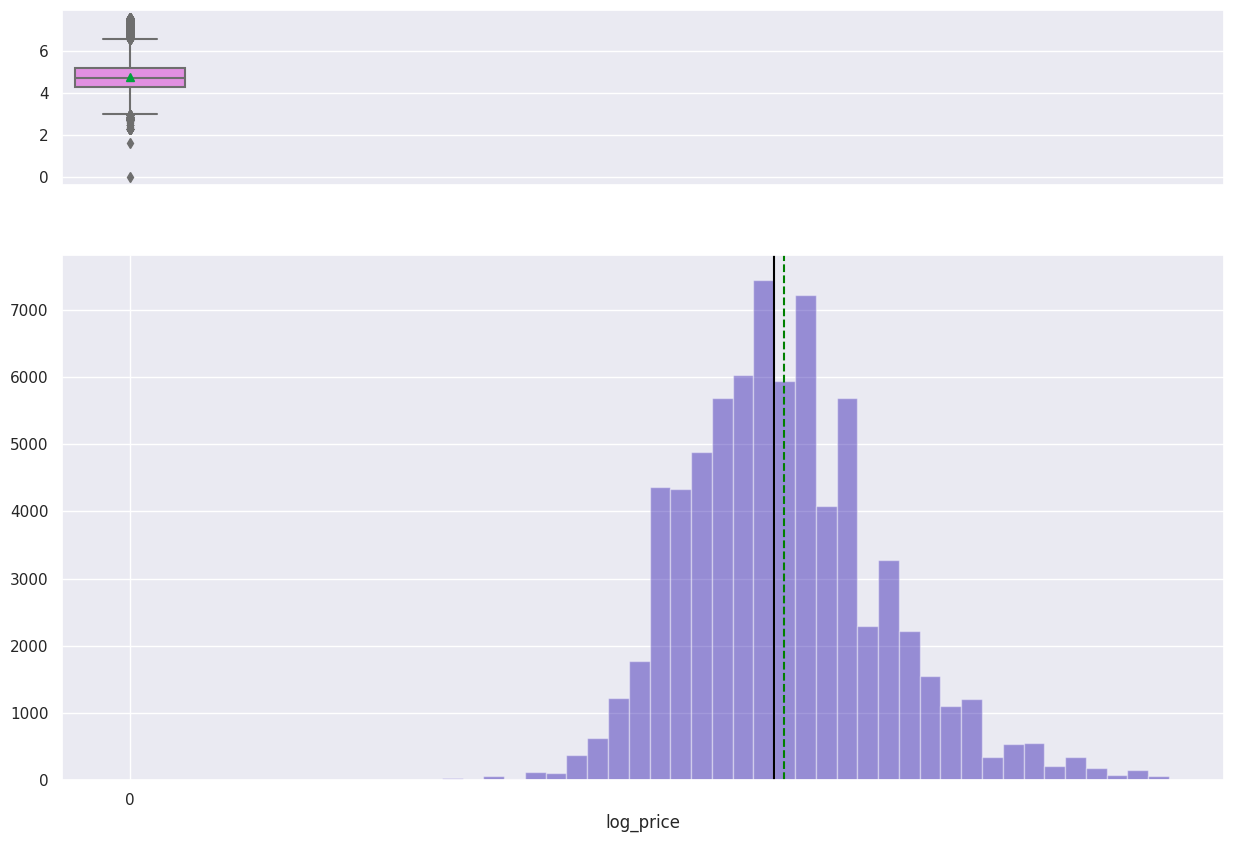

In [ ]:
histogram_boxplot(airbnb_dataset['log_price'])

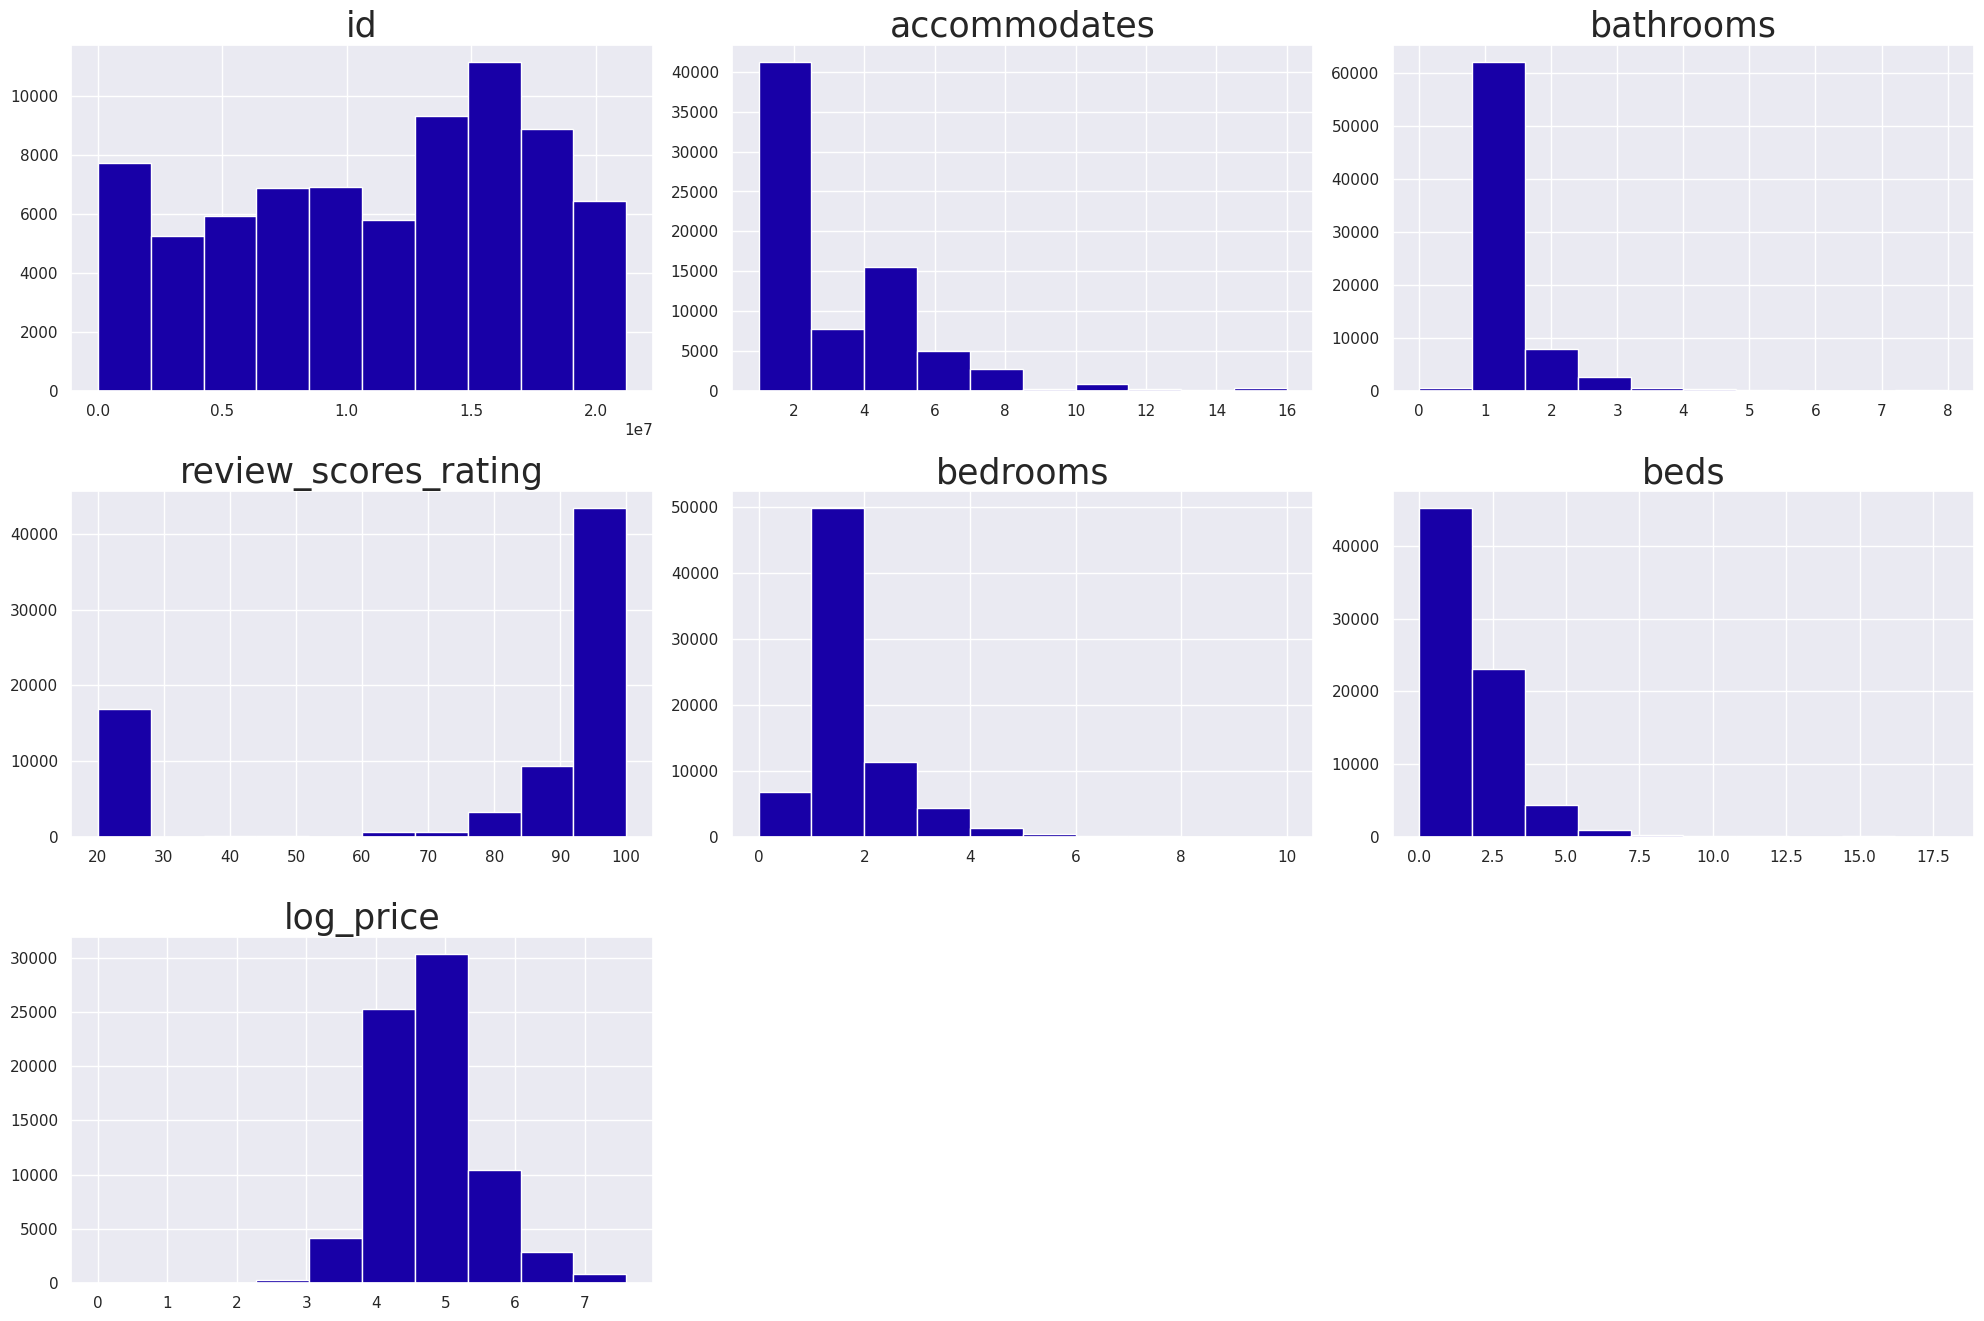

In [ ]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = airbnb_dataset.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,80))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(airbnb_dataset[all_col[i]])
    #sns.displot(airbnb_dataset[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)


plt.show()


##**BIVARIATE ANALYSIS**##

<ipython-input-459-a836a230f7da>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(airbnb_dataset.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')


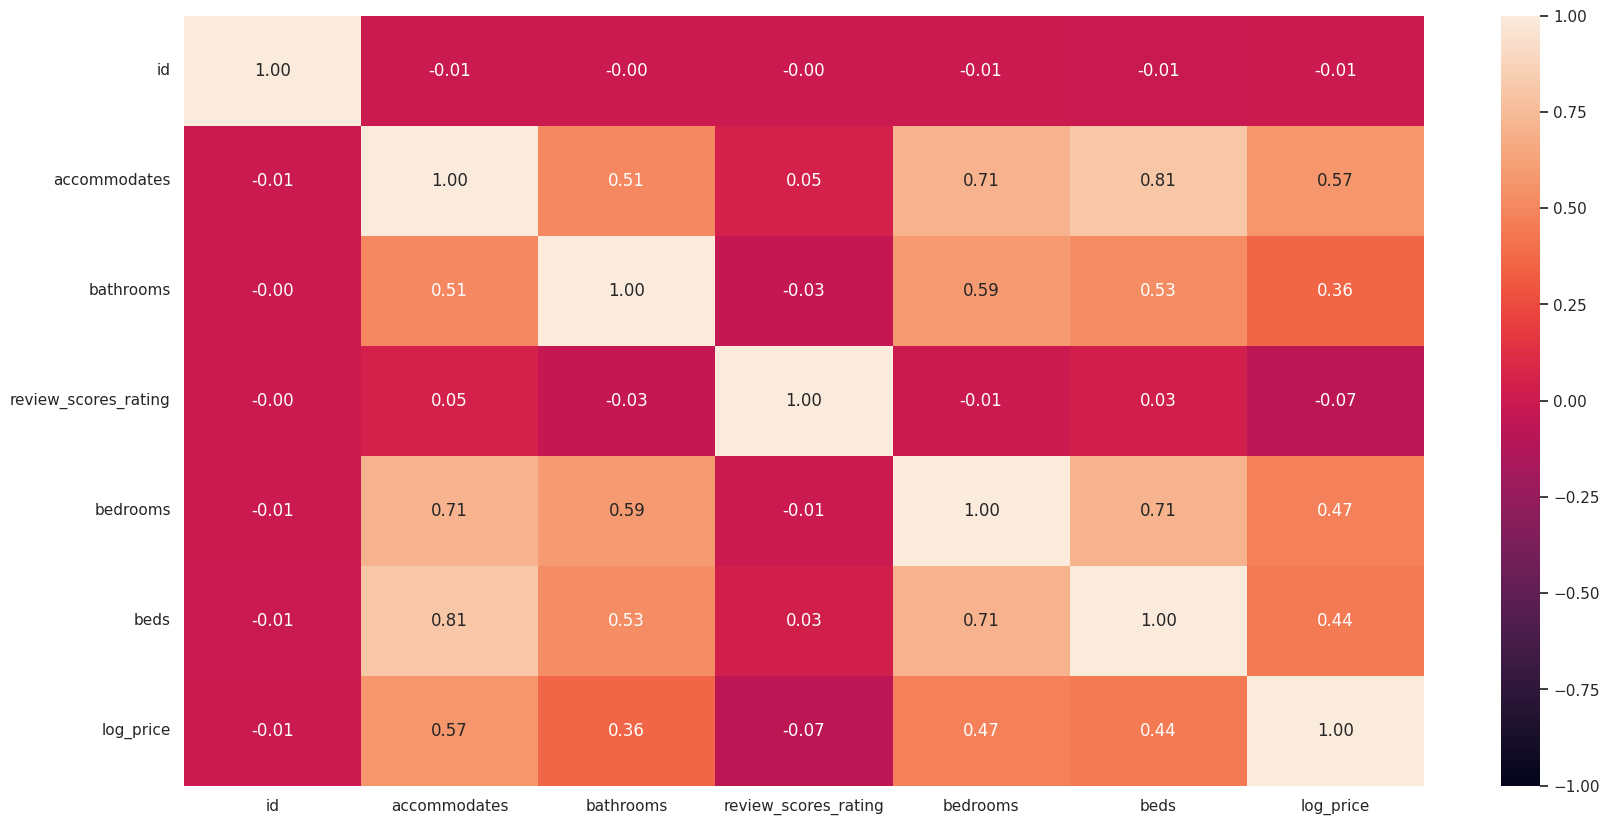

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(airbnb_dataset.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

In [ ]:
airbnb_dataset.corr(method ='pearson')

<ipython-input-460-fd9bd9c81fd6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  airbnb_dataset.corr(method ='pearson')


,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
id,1.000000,-0.005755,-0.004058,-0.004263,-0.007578,-0.008876,-0.007178
accommodates,-0.005755,1.000000,0.505506,0.049729,0.709230,0.810231,0.567572
bathrooms,-0.004058,0.505506,1.000000,-0.025190,0.589783,0.525699,0.355174
review_scores_rating,-0.004263,0.049729,-0.025190,1.000000,-0.007647,0.034815,-0.066501
bedrooms,-0.007578,0.709230,0.589783,-0.007647,1.000000,0.709186,0.473028
beds,-0.008876,0.810231,0.525699,0.034815,0.709186,1.000000,0.441953
log_price,-0.007178,0.567572,0.355174,-0.066501,0.473028,0.441953,1.000000


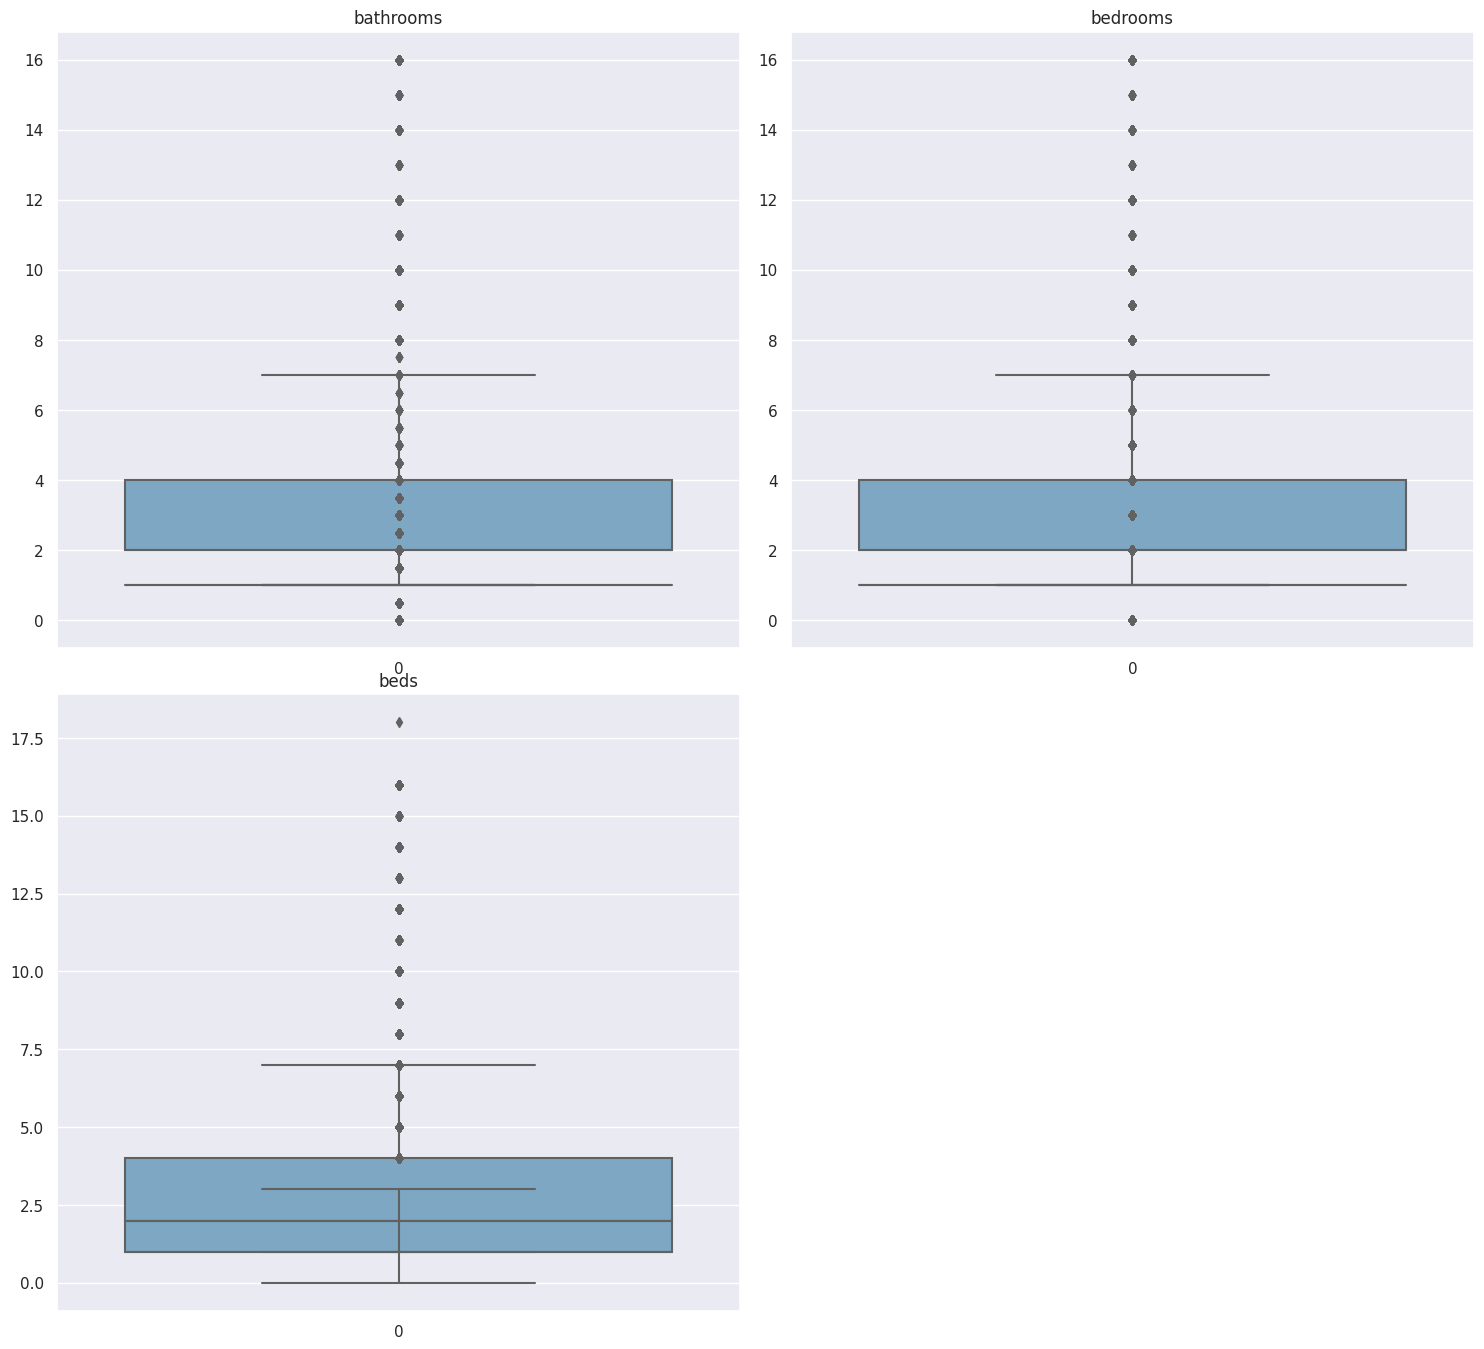

In [ ]:
cols = airbnb_dataset[['bathrooms','bedrooms','beds']].columns.tolist()
plt.figure(figsize=(15,20))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(airbnb_dataset["accommodates"],palette="PuBu")
                     sns.boxplot(airbnb_dataset[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [ ]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,airbnb_dataset['accommodates'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,airbnb_dataset['accommodates'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

accommodates      1.0    2.0   3.0    4.0   5.0   6.0  7.0   8.0  9.0  10.0  \
room_type                                                                     
Entire home/apt   739  12019  5808  10462  3206  4720  907  1739  262   663   
Private room     7551  19194  1879   1480   216   196   30    37    4    18   
Shared room      1144    643   106    124    22    52    9    19    4    20   
All              9434  31856  7793  12066  3444  4968  946  1795  270   701   

accommodates     11.0  12.0  13.0  14.0  15.0  16.0    All  
room_type                                                   
Entire home/apt    77   258    35    97    49   272  41313  
Private room        1     4     1     6     4    14  30635  
Shared room         1     2     0     1     1    15   2163  
All                79   264    36   104    54   301  74111  
------------------------------------------------------------------------------------------------------------------------


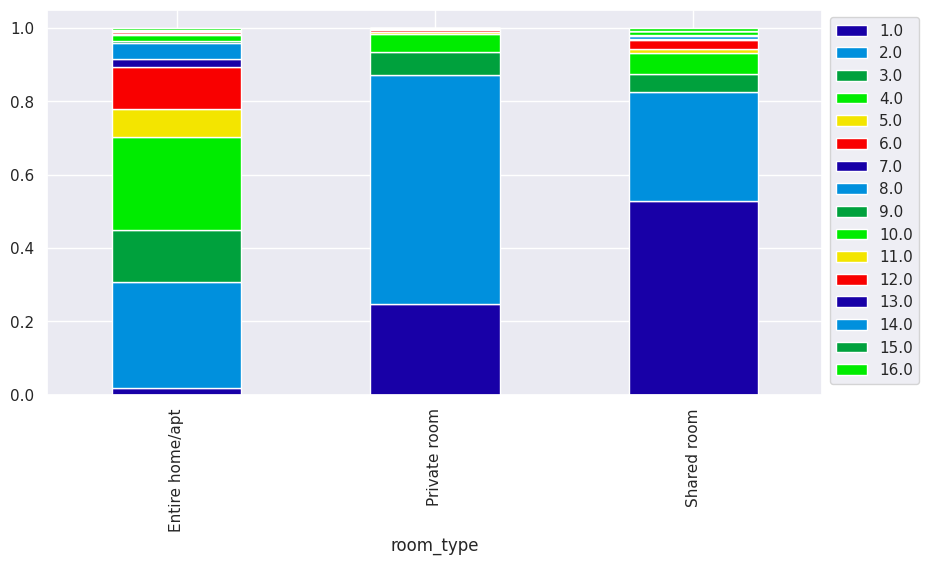

In [ ]:
stacked_plot(airbnb_dataset['room_type'])

accommodates          1.0    2.0   3.0    4.0   5.0   6.0  7.0   8.0  9.0  \
cancellation_policy                                                         
flexible             4395  10950  2083   2940   658   905  138   262   33   
moderate             1967   8903  2211   3216   865  1102  195   345   50   
strict               3072  12003  3499   5910  1921  2961  613  1188  187   
All                  9434  31856  7793  12066  3444  4968  946  1795  270   

accommodates         10.0  11.0  12.0  13.0  14.0  15.0  16.0    All  
cancellation_policy                                                   
flexible               93     4    24     2    13     6    37  22543  
moderate               97     8    37     8    18     4    34  19060  
strict                511    67   203    26    73    44   230  32508  
All                   701    79   264    36   104    54   301  74111  
---------------------------------------------------------------------------------------------------------------

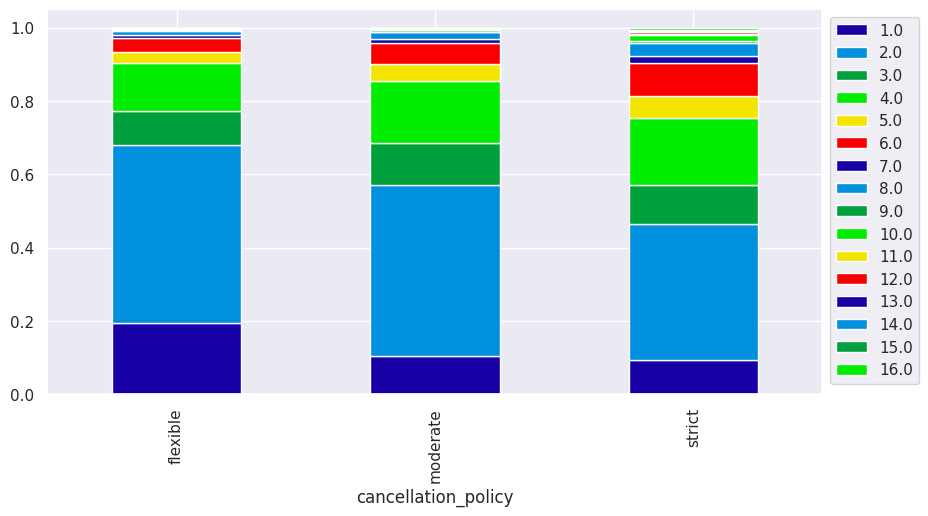

In [ ]:
stacked_plot(airbnb_dataset['cancellation_policy'])

##**OUTLIER DETECTION USING IQR**##

In [ ]:
np.random.seed(1)
x1 = np.random.normal(size=1000)
x2 = np.random.lognormal(size=1000)

def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


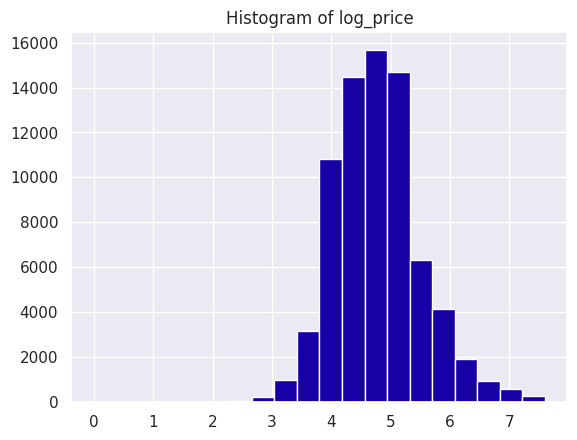

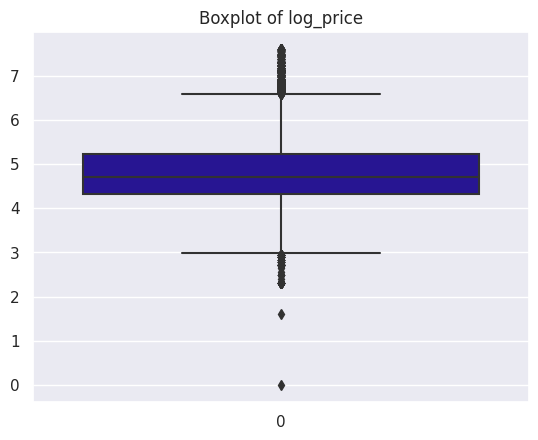

In [ ]:
plt.hist(airbnb_dataset['log_price'], 20)
plt.title('Histogram of log_price')
plt.show()

sns.boxplot(airbnb_dataset['log_price'])
plt.title('Boxplot of log_price')
plt.show()

In [ ]:
quartiles = np.quantile(airbnb_dataset['log_price'][airbnb_dataset['log_price'].notnull()], [.25, .75])
log_price_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {log_price_4iqr}')
outlier_log_price = airbnb_dataset.loc[np.abs(airbnb_dataset['log_price'] - airbnb_dataset['log_price'].median()) > log_price_4iqr, 'log_price']
outlier_log_price

Q1 = 4.317488114, Q3 = 5.220355825, 4*IQR = 3.611470844000003


11632    0.0
Name: log_price, dtype: float64

In [ ]:
airbnb_dataset.drop(outlier_log_price.index, axis=0, inplace=True)

In [ ]:
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


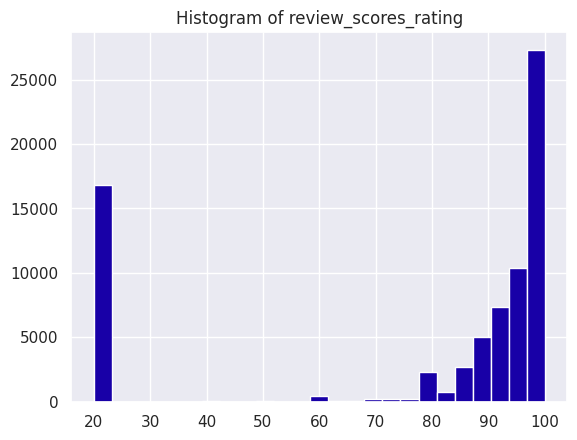

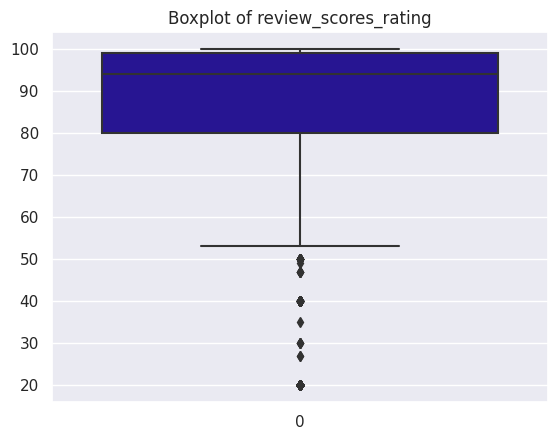

In [ ]:
plt.hist(airbnb_dataset['review_scores_rating'], 25)
plt.title('Histogram of review_scores_rating')
plt.show()

sns.boxplot(airbnb_dataset['review_scores_rating'])
plt.title('Boxplot of review_scores_rating')
plt.show()

In [ ]:
quartiles = np.quantile(airbnb_dataset['review_scores_rating'][airbnb_dataset['review_scores_rating'].notnull()], [.25, .75])
review_scores_rating_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {review_scores_rating_4iqr}')
outlier_review_scores_rating = airbnb_dataset.loc[np.abs(airbnb_dataset['review_scores_rating'] - airbnb_dataset['review_scores_rating'].median()) > review_scores_rating_4iqr, 'review_scores_rating']
outlier_review_scores_rating

Q1 = 80.0, Q3 = 99.0, 4*IQR = 76.0


Series([], Name: review_scores_rating, dtype: float64)

In [ ]:
airbnb_dataset.drop(outlier_review_scores_rating.index, axis=0, inplace=True)

In [ ]:
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


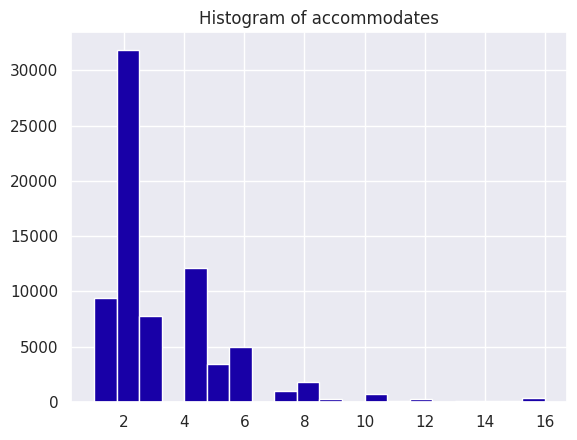

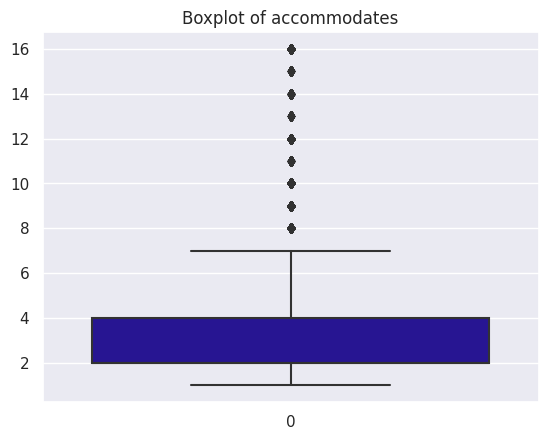

In [ ]:
plt.hist(airbnb_dataset['accommodates'], 20)
plt.title('Histogram of accommodates')
plt.show()

sns.boxplot(airbnb_dataset['accommodates'])
plt.title('Boxplot of accommodates')
plt.show()

In [ ]:
quartiles = np.quantile(airbnb_dataset['accommodates'][airbnb_dataset['accommodates'].notnull()], [.25, .75])
accommodates_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {accommodates_4iqr}')
outlier_accommodates = airbnb_dataset.loc[np.abs(airbnb_dataset['accommodates'] - airbnb_dataset['accommodates'].median()) > accommodates_4iqr, 'accommodates']
outlier_accommodates

Q1 = 2.0, Q3 = 4.0, 4*IQR = 8.0


306      16.0
457      16.0
482      11.0
569      16.0
642      12.0
         ... 
73669    12.0
73695    12.0
73957    14.0
73980    15.0
74081    16.0
Name: accommodates, Length: 838, dtype: float64

In [ ]:
airbnb_dataset.drop(outlier_accommodates.index, axis=0, inplace=True)

In [ ]:
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


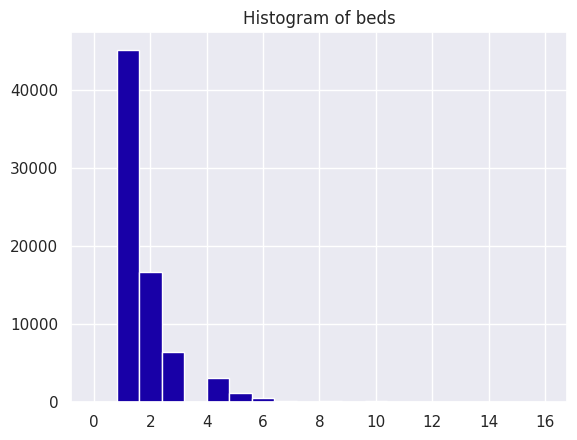

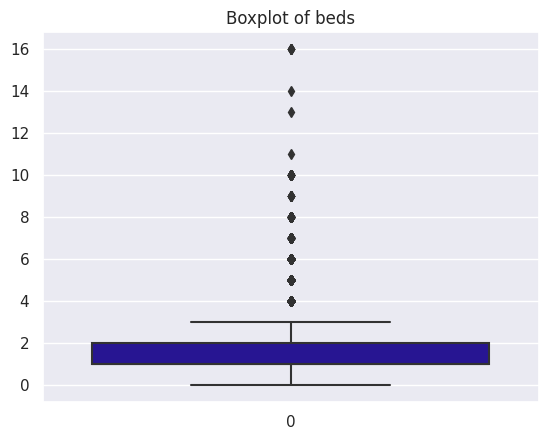

In [ ]:
plt.hist(airbnb_dataset['beds'], 20)
plt.title('Histogram of beds')
plt.show()

sns.boxplot(airbnb_dataset['beds'])
plt.title('Boxplot of beds')
plt.show()

In [ ]:
quartiles = np.quantile(airbnb_dataset['beds'][airbnb_dataset['beds'].notnull()], [.25, .75])
beds_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {beds_4iqr}')
outlier_beds = airbnb_dataset.loc[np.abs(airbnb_dataset['beds'] - airbnb_dataset['beds'].median()) > beds_4iqr, 'beds']
outlier_beds

Q1 = 1.0, Q3 = 2.0, 4*IQR = 4.0


42        7.0
81        6.0
547       6.0
756       8.0
798       6.0
         ... 
73768     6.0
73804     6.0
73842     7.0
73899     6.0
74102    10.0
Name: beds, Length: 781, dtype: float64

In [ ]:
airbnb_dataset.drop(outlier_beds.index, axis=0, inplace=True)

##**DISTRIBUTIONS**##

<Axes: xlabel='log_price', ylabel='Count'>

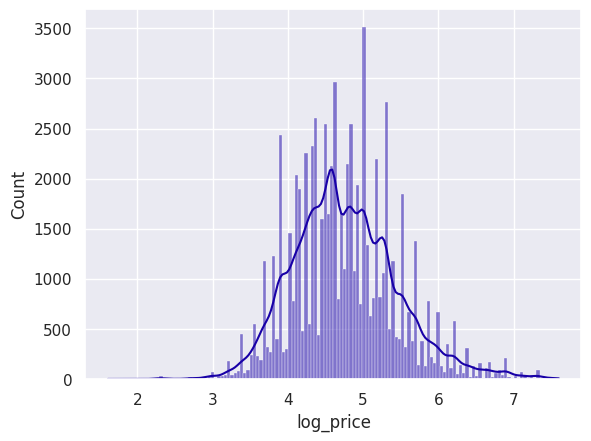

In [ ]:
sns.histplot(airbnb_dataset["log_price"], kde=True)

##**CORRELATION BETWEEN NUMERIC VALUES**##

<ipython-input-482-049bcb03e6f6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(airbnb_dataset.corr(), annot=True, cmap="coolwarm")


<Axes: >

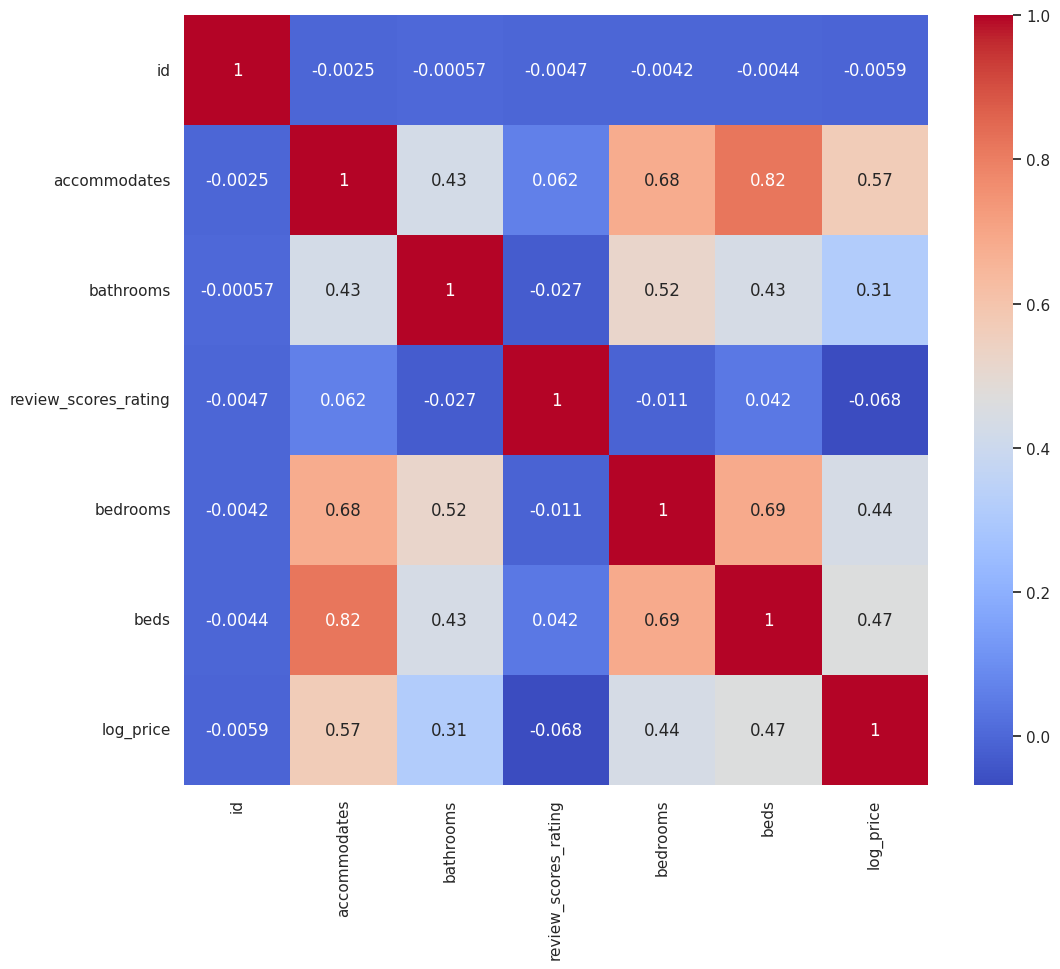

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(airbnb_dataset.corr(), annot=True, cmap="coolwarm")

In [ ]:
airbnb_dataset

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,False,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,True,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,True,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,False,20.0,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,True,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,False,False,20.0,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,False,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,True,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,True,20.0,0.0,2.0,5.273000


##**LINEAR MODEL BUILDING**##

**DEFINE DEPENDENT VARIABLE**

In [ ]:
ind_vars = airbnb_dataset.drop(["accommodates"], axis=1)
dep_var = airbnb_dataset[["log_price"]]
print(ind_vars.head())
print(dep_var.head())

         id        room_type  bathrooms cancellation_policy cleaning_fee  \
0   6901257  Entire home/apt        1.0              strict         True   
1   6304928  Entire home/apt        1.0              strict         True   
2   7919400  Entire home/apt        1.0            moderate         True   
3  13418779  Entire home/apt        1.0            flexible         True   
4   3808709  Entire home/apt        1.0            moderate         True   

  instant_bookable  review_scores_rating  bedrooms  beds  log_price  
0            False                 100.0       1.0   1.0   5.010635  
1             True                  93.0       3.0   3.0   5.129899  
2             True                  92.0       1.0   3.0   4.976734  
3            False                  20.0       2.0   2.0   6.620073  
4             True                  40.0       0.0   1.0   4.744932  
   log_price
0   5.010635
1   5.129899
2   4.976734
3   6.620073
4   4.744932


In [ ]:
ind_vars

,id,room_type,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,1.0,strict,True,False,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,1.0,strict,True,True,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,1.0,moderate,True,True,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,1.0,flexible,True,False,20.0,2.0,2.0,6.620073
4,3808709,Entire home/apt,1.0,moderate,True,True,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,flexible,False,False,20.0,1.0,1.0,4.605170
74107,13281809,Entire home/apt,2.0,moderate,True,False,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,1.0,moderate,True,True,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,1.0,strict,True,True,20.0,0.0,2.0,5.273000


##**CREATING DUMMY VARIABLES**##

In [ ]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x
ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,id,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,6901257,1.0,100.0,1.0,1.0,5.010635,0,0,0,1,1,0
1,6304928,1.0,93.0,3.0,3.0,5.129899,0,0,0,1,1,1
2,7919400,1.0,92.0,1.0,3.0,4.976734,0,0,1,0,1,1
3,13418779,1.0,20.0,2.0,2.0,6.620073,0,0,0,0,1,0
4,3808709,1.0,40.0,0.0,1.0,4.744932,0,0,1,0,1,1


In [ ]:
ind_vars_num

,id,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,6901257,1.0,100.0,1.0,1.0,5.010635,0,0,0,1,1,0
1,6304928,1.0,93.0,3.0,3.0,5.129899,0,0,0,1,1,1
2,7919400,1.0,92.0,1.0,3.0,4.976734,0,0,1,0,1,1
3,13418779,1.0,20.0,2.0,2.0,6.620073,0,0,0,0,1,0
4,3808709,1.0,40.0,0.0,1.0,4.744932,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,1.0,20.0,1.0,1.0,4.605170,1,0,0,0,0,0
74107,13281809,2.0,93.0,2.0,4.0,5.043425,0,0,1,0,1,0
74108,18688039,1.0,94.0,2.0,2.0,5.220356,0,0,1,0,1,1
74109,17045948,1.0,20.0,0.0,2.0,5.273000,0,0,0,1,1,1


##**SPLITTING THE DATA INTO TRAIN AND TEST**##

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

In [ ]:
# Spliting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)


In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", y_train.shape[0])

Number of rows in train data = 50743
Number of rows in train data = 50743


In [ ]:
print("Number of rows in train data =", x_test.shape[0])
print("Number of rows in train data =", y_train.shape[0])

Number of rows in train data = 21748
Number of rows in train data = 50743


In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", y_test.shape[0])

Number of rows in train data = 50743
Number of rows in train data = 21748


In [ ]:
print("Number of rows in train data =", x_test.shape[0])
print("Number of rows in train data =", y_test.shape[0])


Number of rows in train data = 21748
Number of rows in train data = 21748


##**FITTING A LINEAR MODEL**##

In [ ]:
X = ind_vars_num.drop(columns='log_price',axis=1)
Y = ind_vars_num['log_price']

In [ ]:
X.isnull().sum()

id                              0
bathrooms                       0
review_scores_rating            0
bedrooms                        0
beds                            0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
instant_bookable_True           0
dtype: int64

In [ ]:
print(X)

             id  bathrooms  review_scores_rating  bedrooms  beds  \
0       6901257        1.0                 100.0       1.0   1.0   
1       6304928        1.0                  93.0       3.0   3.0   
2       7919400        1.0                  92.0       1.0   3.0   
3      13418779        1.0                  20.0       2.0   2.0   
4       3808709        1.0                  40.0       0.0   1.0   
...         ...        ...                   ...       ...   ...   
74106  14549287        1.0                  20.0       1.0   1.0   
74107  13281809        2.0                  93.0       2.0   4.0   
74108  18688039        1.0                  94.0       2.0   2.0   
74109  17045948        1.0                  20.0       0.0   2.0   
74110   3534845        1.0                  96.0       1.0   2.0   

       room_type_Private room  room_type_Shared room  \
0                           0                      0   
1                           0                      0   
2              

In [ ]:
print(Y)

0        5.010635
1        5.129899
2        4.976734
3        6.620073
4        4.744932
           ...   
74106    4.605170
74107    5.043425
74108    5.220356
74109    5.273000
74110    4.852030
Name: log_price, Length: 72491, dtype: float64


##**MULTI REGRESSOR**##

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2 )

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(72491, 11) (57992, 11) (14499, 11)


##**LINEAR REGRESSION**##

In [ ]:
#loading the Linear Reggression model
regressor = LinearRegression()

In [ ]:
  regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
  y_pred=regressor.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
regressor.score(X_test,Y_test)

0.49078048312772293

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
regressor.predict([[6901257,1.0,100.0,1.0,1.0,0,0,0,1,1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.95050729])

##**LINEAR REGRESSION**##

In [ ]:
airbnb_sub=airbnb_dataset.copy()

In [ ]:
airbnb_sub.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,False,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,True,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,True,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,False,20.0,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,True,40.0,0.0,1.0,4.744932


In [ ]:
airbnb_sub = airbnb_sub.drop(["accommodates","id","room_type","bathrooms","cancellation_policy","cleaning_fee","instant_bookable","bedrooms","beds",], axis=1)

In [ ]:
airbnb_sub.head()

,review_scores_rating,log_price
0,100.0,5.010635
1,93.0,5.129899
2,92.0,4.976734
3,20.0,6.620073
4,40.0,4.744932


In [ ]:
X = airbnb_sub.drop(columns='log_price',axis=1)
Y = airbnb_sub['log_price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2 )

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(72491, 1) (57992, 11) (14499, 11)


In [ ]:
regressor1 = LinearRegression()

In [ ]:
regressor1.fit(x_train,y_train)

LinearRegression()

In [ ]:
Y_pred=regressor1.predict(x_test)

In [ ]:
regressor1.score(x_test,y_test)

0.004237331828316648

In [ ]:
regressor1.predict([[92]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.74093326])

In [ ]:
airbnb_sub2=airbnb_dataset.copy()

##**..(i) Linear Regression for " id "..**##

In [ ]:
airbnb_sub2=airbnb_dataset.copy()

In [ ]:
airbnb_sub2 = airbnb_sub2.drop(["accommodates","review_scores_rating","room_type","bathrooms","cancellation_policy","cleaning_fee","instant_bookable","bedrooms","beds",], axis=1)

In [ ]:
airbnb_sub2.head()

,id,log_price
0,6901257,5.010635
1,6304928,5.129899
2,7919400,4.976734
3,13418779,6.620073
4,3808709,4.744932


In [ ]:
X = airbnb_sub2.drop(columns='log_price',axis=1)
Y = airbnb_sub2['log_price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2 )

In [ ]:
regressor2 = LinearRegression()

In [ ]:
regressor2.fit(x_train,y_train)

LinearRegression()

In [ ]:
Y_pred=regressor2.predict(x_test)

In [ ]:
regressor2.score(x_test,y_test)

-5.2717795141710155e-05

In [ ]:
regressor2.predict([[6304928]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.76453016])

##**..(ii)Linear Regression for "accomodates"..**##

In [ ]:
airbnb_sub3=airbnb_dataset.copy()

In [ ]:
airbnb_sub3 = airbnb_sub3.drop(["room_type","review_scores_rating","id","bathrooms","cancellation_policy","cleaning_fee","instant_bookable","bedrooms","beds",], axis=1)

In [ ]:
airbnb_sub3.head()

,accommodates,log_price
0,3.0,5.010635
1,7.0,5.129899
2,5.0,4.976734
3,4.0,6.620073
4,2.0,4.744932


In [ ]:
X = airbnb_sub3.drop(columns='log_price',axis=1)
Y = airbnb_sub3['log_price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2 )

In [ ]:
regressor3 = LinearRegression()

In [ ]:
regressor3.fit(x_train,y_train)

LinearRegression()

In [ ]:
Y_pred=regressor3.predict(x_test)

In [ ]:
regressor3.score(x_test,y_test)

0.32844210603518964

In [ ]:
regressor2.predict([[4.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.76704024])

##**..(iii)Linear Regression for "bathrooms"..**##

In [ ]:
airbnb_sub4=airbnb_dataset.copy()

In [ ]:
airbnb_sub4 = airbnb_sub4.drop(["room_type","review_scores_rating","id","accommodates","cancellation_policy","cleaning_fee","instant_bookable","bedrooms","beds",], axis=1)

In [ ]:
airbnb_sub4.head()

,bathrooms,log_price
0,1.0,5.010635
1,1.0,5.129899
2,1.0,4.976734
3,1.0,6.620073
4,1.0,4.744932


In [ ]:
X = airbnb_sub4.drop(columns='log_price',axis=1)
Y = airbnb_sub4['log_price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2 )

In [ ]:
regressor4 = LinearRegression()

In [ ]:
regressor4.fit(x_train,y_train)

LinearRegression()

In [ ]:
Y_pred=regressor4.predict(x_test)

In [ ]:
regressor4.score(x_test,y_test)

0.08854439381855339

In [ ]:
regressor2.predict([[1.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.76704024])

##**..(iv)Linear Regression for "bedrooms"..**##

In [ ]:
airbnb_sub5=airbnb_dataset.copy()

In [ ]:
airbnb_sub5 = airbnb_sub5.drop(["room_type","review_scores_rating","id","accommodates","cancellation_policy","cleaning_fee","instant_bookable","bathrooms","beds",], axis=1)

In [ ]:
airbnb_sub5.head()

,bedrooms,log_price
0,1.0,5.010635
1,3.0,5.129899
2,1.0,4.976734
3,2.0,6.620073
4,0.0,4.744932


In [ ]:
X = airbnb_sub5.drop(columns='log_price',axis=1)
Y = airbnb_sub5['log_price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2 )

In [ ]:
regressor5 = LinearRegression()

In [ ]:
regressor5.fit(x_train,y_train)

LinearRegression()

In [ ]:
Y_pred = regressor5.predict(x_test)

In [ ]:
regressor5.score(x_test,y_test)

0.19059795476463604

In [ ]:
regressor5.predict([[2.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.07786003])

##**..Linear Regression for "review_score_rating"**##

In [ ]:
airbnb_sub6 = airbnb_dataset.copy()

In [ ]:
airbnb_sub6 = airbnb_sub6.drop(["room_type","review_scores_rating","id","accommodates","cancellation_policy","cleaning_fee","instant_bookable","bathrooms","bedrooms",], axis=1)

In [ ]:
airbnb_sub.head()

,review_scores_rating,log_price
0,100.0,5.010635
1,93.0,5.129899
2,92.0,4.976734
3,20.0,6.620073
4,40.0,4.744932


In [ ]:
X = airbnb_sub6.drop(columns='log_price',axis=1)
Y = airbnb_sub6['log_price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2 )

In [ ]:
regressor6 = LinearRegression()

In [ ]:
regressor6.fit(x_train, y_train)

LinearRegression()

In [ ]:
Y_pred = regressor6.predict(x_test)

In [ ]:
regressor6.score(x_test,y_test)

0.21768592833792366

In [ ]:
regressor6.predict([[2.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.90142447])

##**SUMMARIZATION OF THE PROCESS**##
FIRST STEP in the process of the project is to import the required and necessary libraries


*   Then it reads in a table of airbnb data from
  MyDrive and prints out the head of the airbnb.

*   Next, the dataset name **airbnb_dataset** is created for the further coding process.

*   After that we will have the information,head file,missing variables,and filling with missing variables etc.., is done.

*   Next we check whether the null values are present or not and if present,then it will be filled by any other variable to avoid null value.

*   The code is used to read the data from a text file into a pandas DataFrame.

*   The shape property of the DataFrame shows that it has eleven columns:- **id ,	room_type ,	accommodates ,	bathrooms	, cancellation_policy	, cleaning_fee ,	instant_bookable ,	review_scores_rating ,	bedrooms, 	beds ,	log_price**

*   The code then uses the drop() method on a specific column to remove it from its original position in order to view only one column at a time.

*   The code is trying to split the data given about the airbnb company into two groups:-

* **1)training**
 **And**
 **2) testing.**

*   The code above splits the data into two sets: X_train and y_train

*   It fits this model on the training data set and calculates its accuracy using test data set.

*   Next , Linear Regression is done and the Simple and Multiple Linear Regression is done.

*   The code then creates a function that takes in both sets of data as input and outputs the predicted values for each value in the test set.

*   Finally, the code is done by predicting the **log price** as it is the cost prediction of the **AirBNB.**




##**FINALLY THE MAJOR PROJECT IS DONE BY A.V.AMBAREEESH**##